# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

# Importing Libraries

In [49]:
import warnings
warnings.filterwarnings('ignore')


from platform import version
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge


---
# Version Control

In [50]:
print(f'Python Version: {version()}')
print(f'Pandas Version: {pd.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')
print(f'Seaborn Version: {sns.__version__}')

Python Version: 10.0.22621
Pandas Version: 1.3.4
Matplotlib Version: 3.4.3
Seaborn Version: 0.11.2


---
# Loading The  Dataset

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

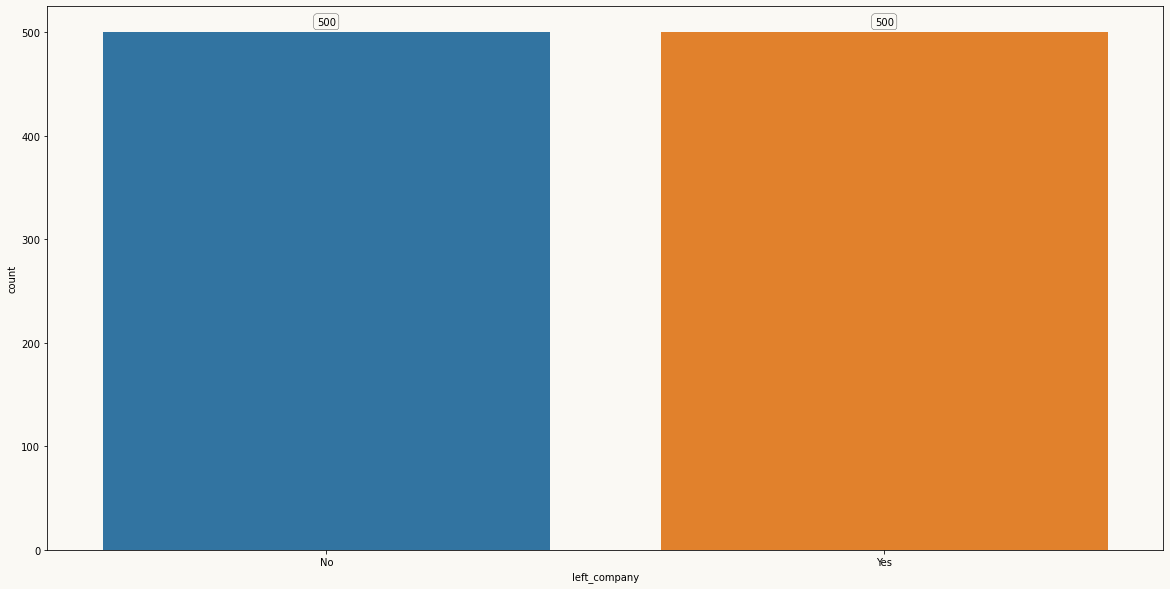

In [52]:
color_palette = ["#eeb977","#8d9e8c"]

fig = plt.figure(figsize = (20, 10))
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0.set_facecolor(background_color) # axes background color

sns.countplot(data = df, x = 'left_company', ax = ax0)

for p in ax0.patches:
    value = f'{p.get_height():.0f}'
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()
    ax0.text(x-0.4,y+10, value, ha = 'center', va = 'center', fontsize = 10,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))


**As we can see in the graph above, target is perfectly balanced.**

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [53]:
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [54]:
numerical_vars = [col for col in df.columns if df[col].dtype != object]

categorical_Vars = [col for col in df.columns if col not in ['left_company'] and col not in numerical_vars]

In [55]:
print(f"Numerical Variables:")
print(numerical_vars)
print()
print()
print(f"Categorical Variables:")
print(categorical_Vars)

Numerical Variables:
['age', 'commuting_distance', 'education', 'satisfaction_with_environment', 'seniority_level', 'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']


Categorical Variables:
['frequency_of_travel', 'department', 'gender', 'position', 'married_or_single']


**I am using the columns which have numeric value in them as a numerical variables and all oh=thers as categorical variables.**

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

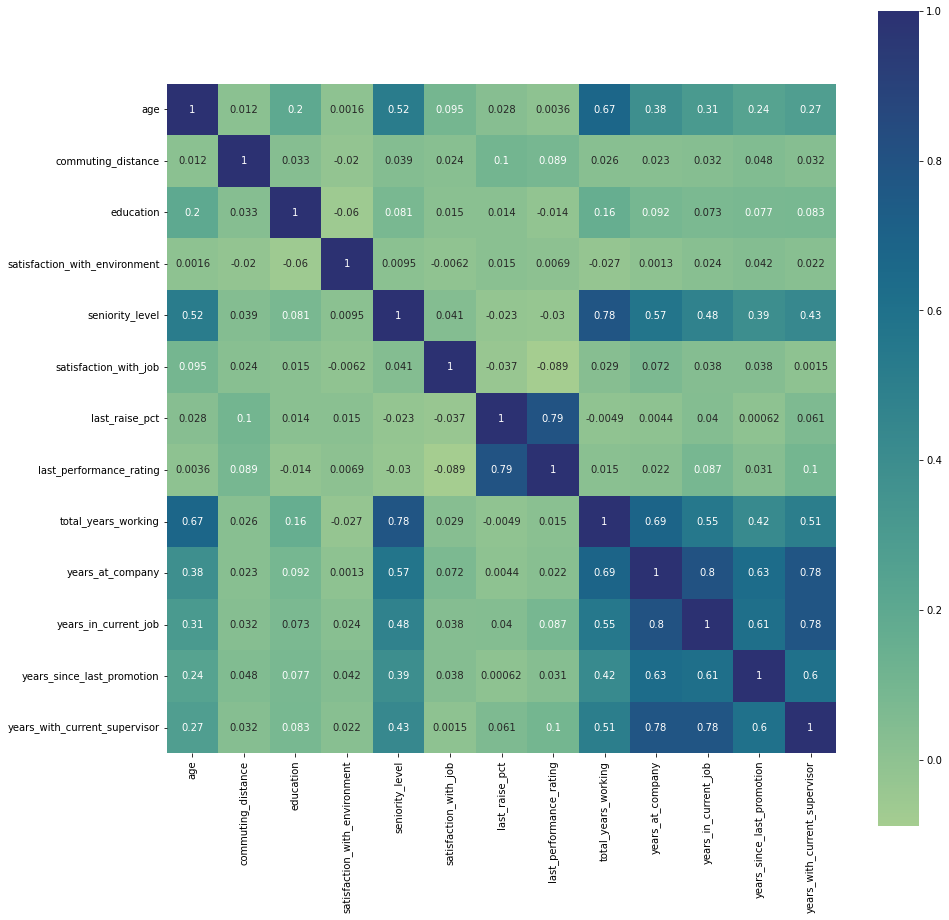

In [56]:
corr = df[numerical_vars].corr()

plt.figure(figsize = (15, 15))
_ = sns.heatmap(data = corr, square=True, annot = True, cmap="crest")

**Few columns are highly correlated. But the higest correlation we have is 0.8. So i will ntot drop any column.**

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [57]:
# insert code here
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge


In [70]:
features = [x for x in df.columns if x != 'left_company']

X = df[features]
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 800
Records in test data: 200

Features:
age
frequency_of_travel
department
commuting_distance
education
satisfaction_with_environment
gender
seniority_level
position
satisfaction_with_job
married_or_single
last_raise_pct
last_performance_rating
total_years_working
years_at_company
years_in_current_job
years_since_last_promotion
years_with_current_supervisor


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [71]:
num_pipeline = Pipeline( [('imputer missing', SimpleImputer(strategy='median')),
                         ('standardize', StandardScaler())])

cat_pipeline = Pipeline([('imputer missing', SimpleImputer(strategy='most_frequent')),
                         ('one hot encoding', OneHotEncoder( drop = 'first'))])

ct = ColumnTransformer(transformers=[('num_features', num_pipeline, numerical_vars), 
                                     ('cat_features', cat_pipeline, categorical_Vars)])
data = ct.fit_transform(X_train)

In [72]:
data.shape

(800, 28)

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [73]:
procesing_pipeline = ColumnTransformer(transformers=[('num_features', num_pipeline, numerical_vars),
                                                    ('cat_features', cat_pipeline, categorical_Vars),])

modeling_pipeline = Pipeline([('data_preprocessing', procesing_pipeline),
                             ('Model', LogisticRegression())])

modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('num_features',
                                                  Pipeline(steps=[('imputer '
                                                                   'missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'seniority_level',
                                                   'satisfaction_with_job',
                                                   'last_raise_pct',
                        

#### Predicting on train set

In [74]:
preds = modeling_pipeline.predict(X_train)
print('Accuracy is: ')
accuracy_score(preds, y_train)

Accuracy is: 


0.73375

#### Predicting on test set

In [75]:
preds = modeling_pipeline.predict(X_test)
print('Accuracy is: ')
accuracy_score(preds, y_test)

Accuracy is: 


0.66

**As we can see the difference between accuracy on training and testing data is approximetely 0.073. We can say that our model is slightly overfitting.**

---
# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Evaluation:
> To evaluate the model, we can check the ROC and AUC curves.

> We can also use cross-valiadtion strategies.

Develop:
> To develop the model we can do some feature engineering.

> Hyperparameter Tuning